In [1]:
import tensorflow as tf
import numpy as np

In [2]:
tf.__version__

'2.15.0'

In [3]:
tf.random.set_seed(42)

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]

X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_train_full.shape, y_train_full.shape

((45000, 32, 32, 3),
 (45000, 1),
 (5000, 32, 32, 3),
 (5000, 1),
 (50000, 32, 32, 3),
 (50000, 1))

In [9]:
model_cifar10 = tf.keras.Sequential()

model_cifar10.add(tf.keras.layers.Flatten(input_shape=X_train[0].shape))

for _ in range(20):
    model_cifar10.add(tf.keras.layers.Dense(units=100, activation="swish", kernel_initializer="he_normal"))

model_cifar10.add(tf.keras.layers.Dense(10, activation="softmax"))


In [10]:
model_cifar10.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense_20 (Dense)            (None, 100)               307300    
                                                                 
 dense_21 (Dense)            (None, 100)               10100     
                                                                 
 dense_22 (Dense)            (None, 100)               10100     
                                                                 
 dense_23 (Dense)            (None, 100)               10100     
                                                                 
 dense_24 (Dense)            (None, 100)               10100     
                                                                 
 dense_25 (Dense)            (None, 100)              

In [12]:
model_cifar10.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.legacy.Nadam(), metrics=["accuracy"])

In [17]:
from pathlib import Path

early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=30, restore_best_weights=True)
model_ckpt_cb = tf.keras.callbacks.ModelCheckpoint("model_cifar10-refresher.ckpt", save_best_only=True)

def exp_decay(steps):
    def exp_decay_func(epoch, lr):
        return lr * 0.1 ** (epoch / steps)
    return exp_decay_func

exp_lr = exp_decay(20)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exp_lr)

In [14]:
run_idx = 1
run_logdir = Path() / "cifar10_refresher_logs" / f"run_{run_idx:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

In [18]:
callback_lst = [early_stopping_cb, lr_scheduler, model_ckpt_cb, tensorboard_cb]

In [20]:
hist_v1 = model_cifar10.fit(X_train, y_train, epochs=1000, validation_data=(X_valid, y_valid), callbacks=callback_lst, verbose=1)

Epoch 1/1000
1407/1407 [==============================] - 59s 42ms/step - loss: 1.6233 - accuracy: 0.4113 - val_loss: 1.6677 - val_accuracy: 0.3992 - lr: 2.2387e-11
Epoch 2/1000
1407/1407 [==============================] - 58s 41ms/step - loss: 1.6233 - accuracy: 0.4113 - val_loss: 1.6677 - val_accuracy: 0.3992 - lr: 1.9953e-11
Epoch 3/1000
1407/1407 [==============================] - 58s 41ms/step - loss: 1.6233 - accuracy: 0.4113 - val_loss: 1.6677 - val_accuracy: 0.3992 - lr: 1.5849e-11
Epoch 4/1000
1407/1407 [==============================] - 58s 41ms/step - loss: 1.6233 - accuracy: 0.4113 - val_loss: 1.6677 - val_accuracy: 0.3992 - lr: 1.1220e-11
Epoch 5/1000
1407/1407 [==============================] - 59s 42ms/step - loss: 1.6233 - accuracy: 0.4113 - val_loss: 1.6677 - val_accuracy: 0.3992 - lr: 7.0795e-12
Epoch 6/1000
1407/1407 [==============================] - 59s 42ms/step - loss: 1.6233 - accuracy: 0.4113 - val_loss: 1.6677 - val_accuracy: 0.3992 - lr: 3.9811e-12
Epoch 7/10

<Axes: xlabel='lr', ylabel='val_accuracy'>

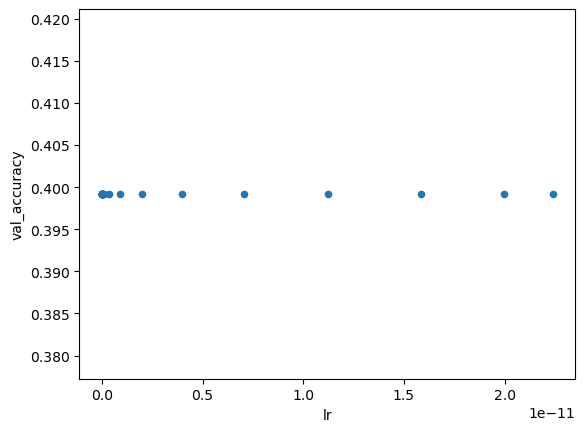

In [44]:
import pandas as pd

pd.DataFrame.from_dict(hist_v1.history).plot(x="lr", y="val_accuracy", kind="scatter")

<Axes: xlabel='lr', ylabel='accuracy'>

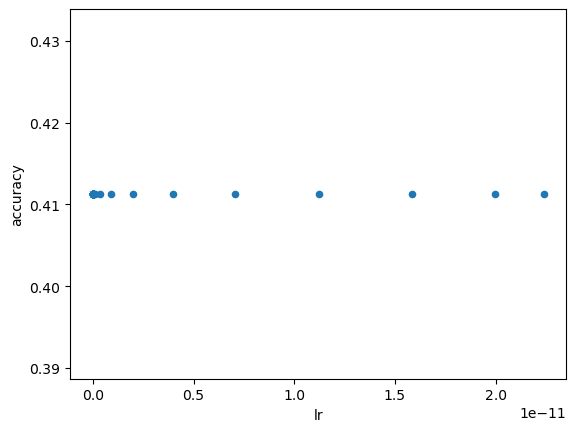

In [45]:
pd.DataFrame.from_dict(hist_v1.history).plot(x="lr", y="accuracy", kind="scatter")

In [24]:
model_cifar10_BN = tf.keras.Sequential()

model_cifar10_BN.add(tf.keras.layers.Flatten(input_shape=X_train[0].shape))

for _ in range(20):
    model_cifar10_BN.add(tf.keras.layers.Dense(units=10, kernel_initializer="he_normal"))
    model_cifar10_BN.add(tf.keras.layers.BatchNormalization())
    model_cifar10_BN.add(tf.keras.layers.Activation("swish"))    

model_cifar10_BN.add(tf.keras.layers.Dense(10, activation="softmax"))


In [25]:
model_cifar10_BN.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_43 (Dense)            (None, 10)                30730     
                                                                 
 batch_normalization_2 (Bat  (None, 10)                40        
 chNormalization)                                                
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
 dense_44 (Dense)            (None, 10)                110       
                                                                 
 batch_normalization_3 (Bat  (None, 10)                40        
 chNormalization)                                     

In [26]:
model_cifar10_BN.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.legacy.Nadam(), metrics=["accuracy"])

In [30]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=20, restore_best_weights=True)
model_ckpt_cb = tf.keras.callbacks.ModelCheckpoint("model_cifar10-BN-refresher.ckpt", save_best_only=True)


In [28]:
run_idx = 1
run_logdir = Path() / "cifar10_refresher_BN_logs" / f"run_{run_idx:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

In [31]:
callback_lst = [early_stopping_cb, lr_scheduler, model_ckpt_cb, tensorboard_cb]

In [46]:
hist_v2 = model_cifar10_BN.fit(X_train, y_train, epochs=1000, validation_data=(X_valid, y_valid), callbacks=callback_lst, verbose=1)

Epoch 1/1000
1407/1407 [==============================] - ETA: 0s - loss: 2.1761 - accuracy: 0.1744INFO:tensorflow:Assets written to: model_cifar10-BN-refresher.ckpt/assets


INFO:tensorflow:Assets written to: model_cifar10-BN-refresher.ckpt/assets


1407/1407 [==============================] - 164s 100ms/step - loss: 2.1761 - accuracy: 0.1744 - val_loss: 2.0764 - val_accuracy: 0.2182 - lr: 0.0010
Epoch 2/1000
1407/1407 [==============================] - ETA: 0s - loss: 2.0149 - accuracy: 0.2371INFO:tensorflow:Assets written to: model_cifar10-BN-refresher.ckpt/assets


INFO:tensorflow:Assets written to: model_cifar10-BN-refresher.ckpt/assets


1407/1407 [==============================] - 132s 94ms/step - loss: 2.0149 - accuracy: 0.2371 - val_loss: 1.9798 - val_accuracy: 0.2522 - lr: 8.9125e-04
Epoch 3/1000
1407/1407 [==============================] - ETA: 0s - loss: 1.9411 - accuracy: 0.2629INFO:tensorflow:Assets written to: model_cifar10-BN-refresher.ckpt/assets


INFO:tensorflow:Assets written to: model_cifar10-BN-refresher.ckpt/assets


1407/1407 [==============================] - 132s 94ms/step - loss: 1.9411 - accuracy: 0.2629 - val_loss: 1.9752 - val_accuracy: 0.2562 - lr: 7.0795e-04
Epoch 4/1000
1407/1407 [==============================] - ETA: 0s - loss: 1.8981 - accuracy: 0.2785INFO:tensorflow:Assets written to: model_cifar10-BN-refresher.ckpt/assets


INFO:tensorflow:Assets written to: model_cifar10-BN-refresher.ckpt/assets


1407/1407 [==============================] - 132s 94ms/step - loss: 1.8981 - accuracy: 0.2785 - val_loss: 1.9471 - val_accuracy: 0.2554 - lr: 5.0119e-04
Epoch 5/1000
1407/1407 [==============================] - ETA: 0s - loss: 1.8823 - accuracy: 0.2859INFO:tensorflow:Assets written to: model_cifar10-BN-refresher.ckpt/assets


INFO:tensorflow:Assets written to: model_cifar10-BN-refresher.ckpt/assets


1407/1407 [==============================] - 3964s 3s/step - loss: 1.8823 - accuracy: 0.2859 - val_loss: 1.8537 - val_accuracy: 0.2886 - lr: 3.1623e-04
Epoch 6/1000
1407/1407 [==============================] - 1592s 1s/step - loss: 1.8598 - accuracy: 0.2941 - val_loss: 1.8538 - val_accuracy: 0.2960 - lr: 1.7783e-04
Epoch 7/1000
1407/1407 [==============================] - ETA: 0s - loss: 1.8470 - accuracy: 0.2985INFO:tensorflow:Assets written to: model_cifar10-BN-refresher.ckpt/assets


INFO:tensorflow:Assets written to: model_cifar10-BN-refresher.ckpt/assets


1407/1407 [==============================] - 131s 93ms/step - loss: 1.8470 - accuracy: 0.2985 - val_loss: 1.8279 - val_accuracy: 0.3134 - lr: 8.9125e-05
Epoch 8/1000
1407/1407 [==============================] - ETA: 0s - loss: 1.8422 - accuracy: 0.2995INFO:tensorflow:Assets written to: model_cifar10-BN-refresher.ckpt/assets


INFO:tensorflow:Assets written to: model_cifar10-BN-refresher.ckpt/assets


1407/1407 [==============================] - 130s 92ms/step - loss: 1.8422 - accuracy: 0.2995 - val_loss: 1.8234 - val_accuracy: 0.3052 - lr: 3.9811e-05
Epoch 9/1000
1407/1407 [==============================] - ETA: 0s - loss: 1.8381 - accuracy: 0.2993INFO:tensorflow:Assets written to: model_cifar10-BN-refresher.ckpt/assets


INFO:tensorflow:Assets written to: model_cifar10-BN-refresher.ckpt/assets


1407/1407 [==============================] - 130s 92ms/step - loss: 1.8381 - accuracy: 0.2993 - val_loss: 1.8194 - val_accuracy: 0.3130 - lr: 1.5849e-05
Epoch 10/1000
1407/1407 [==============================] - ETA: 0s - loss: 1.8376 - accuracy: 0.3030INFO:tensorflow:Assets written to: model_cifar10-BN-refresher.ckpt/assets


INFO:tensorflow:Assets written to: model_cifar10-BN-refresher.ckpt/assets


1407/1407 [==============================] - 130s 92ms/step - loss: 1.8376 - accuracy: 0.3030 - val_loss: 1.8184 - val_accuracy: 0.3096 - lr: 5.6234e-06
Epoch 11/1000
1407/1407 [==============================] - ETA: 0s - loss: 1.8374 - accuracy: 0.3056INFO:tensorflow:Assets written to: model_cifar10-BN-refresher.ckpt/assets


INFO:tensorflow:Assets written to: model_cifar10-BN-refresher.ckpt/assets


1407/1407 [==============================] - 131s 93ms/step - loss: 1.8374 - accuracy: 0.3056 - val_loss: 1.8172 - val_accuracy: 0.3114 - lr: 1.7783e-06
Epoch 12/1000
1407/1407 [==============================] - ETA: 0s - loss: 1.8368 - accuracy: 0.3038INFO:tensorflow:Assets written to: model_cifar10-BN-refresher.ckpt/assets


INFO:tensorflow:Assets written to: model_cifar10-BN-refresher.ckpt/assets


1407/1407 [==============================] - 129s 92ms/step - loss: 1.8368 - accuracy: 0.3038 - val_loss: 1.8171 - val_accuracy: 0.3082 - lr: 5.0119e-07
Epoch 13/1000
1407/1407 [==============================] - 125s 89ms/step - loss: 1.8394 - accuracy: 0.3029 - val_loss: 1.8177 - val_accuracy: 0.3128 - lr: 1.2589e-07
Epoch 14/1000
1407/1407 [==============================] - 125s 89ms/step - loss: 1.8381 - accuracy: 0.3030 - val_loss: 1.8183 - val_accuracy: 0.3078 - lr: 2.8184e-08
Epoch 15/1000
1407/1407 [==============================] - ETA: 0s - loss: 1.8375 - accuracy: 0.3012INFO:tensorflow:Assets written to: model_cifar10-BN-refresher.ckpt/assets


INFO:tensorflow:Assets written to: model_cifar10-BN-refresher.ckpt/assets


1407/1407 [==============================] - 1137s 809ms/step - loss: 1.8375 - accuracy: 0.3012 - val_loss: 1.8168 - val_accuracy: 0.3098 - lr: 5.6234e-09
Epoch 16/1000
1407/1407 [==============================] - 125s 89ms/step - loss: 1.8440 - accuracy: 0.3018 - val_loss: 1.8179 - val_accuracy: 0.3094 - lr: 1.0000e-09
Epoch 17/1000
1407/1407 [==============================] - 125s 89ms/step - loss: 1.8405 - accuracy: 0.3018 - val_loss: 1.8187 - val_accuracy: 0.3090 - lr: 1.5849e-10
Epoch 18/1000
1407/1407 [==============================] - 125s 89ms/step - loss: 1.8365 - accuracy: 0.3032 - val_loss: 1.8177 - val_accuracy: 0.3094 - lr: 2.2387e-11
Epoch 19/1000
1407/1407 [==============================] - ETA: 0s - loss: 1.8369 - accuracy: 0.3042INFO:tensorflow:Assets written to: model_cifar10-BN-refresher.ckpt/assets


INFO:tensorflow:Assets written to: model_cifar10-BN-refresher.ckpt/assets


1407/1407 [==============================] - 129s 92ms/step - loss: 1.8369 - accuracy: 0.3042 - val_loss: 1.8164 - val_accuracy: 0.3094 - lr: 2.8184e-12
Epoch 20/1000
1407/1407 [==============================] - 1410s 1s/step - loss: 1.8375 - accuracy: 0.3030 - val_loss: 1.8175 - val_accuracy: 0.3094 - lr: 3.1623e-13
Epoch 21/1000
1407/1407 [==============================] - 1988s 1s/step - loss: 1.8378 - accuracy: 0.3029 - val_loss: 1.8184 - val_accuracy: 0.3110 - lr: 3.1623e-14
Epoch 22/1000
1407/1407 [==============================] - 132s 94ms/step - loss: 1.8371 - accuracy: 0.3044 - val_loss: 1.8169 - val_accuracy: 0.3088 - lr: 2.8184e-15
Epoch 23/1000
1407/1407 [==============================] - 128s 91ms/step - loss: 1.8356 - accuracy: 0.3028 - val_loss: 1.8167 - val_accuracy: 0.3086 - lr: 2.2387e-16
Epoch 24/1000
1407/1407 [==============================] - 131s 93ms/step - loss: 1.8350 - accuracy: 0.3012 - val_loss: 1.8185 - val_accuracy: 0.3094 - lr: 1.5849e-17
Epoch 25/1000


INFO:tensorflow:Assets written to: model_cifar10-BN-refresher.ckpt/assets


1407/1407 [==============================] - 21646s 15s/step - loss: 1.8378 - accuracy: 0.3026 - val_loss: 1.8154 - val_accuracy: 0.3092 - lr: 3.9811e-30
Epoch 34/1000
1407/1407 [==============================] - 3585s 3s/step - loss: 1.8350 - accuracy: 0.3036 - val_loss: 1.8187 - val_accuracy: 0.3082 - lr: 8.9125e-32
Epoch 35/1000
1407/1407 [==============================] - 125s 89ms/step - loss: 1.8387 - accuracy: 0.3020 - val_loss: 1.8172 - val_accuracy: 0.3108 - lr: 1.7783e-33
Epoch 36/1000
1407/1407 [==============================] - 125s 89ms/step - loss: 1.8410 - accuracy: 0.3038 - val_loss: 1.8183 - val_accuracy: 0.3108 - lr: 3.1623e-35
Epoch 37/1000
1407/1407 [==============================] - 106s 75ms/step - loss: 1.8355 - accuracy: 0.3050 - val_loss: 1.8172 - val_accuracy: 0.3094 - lr: 5.0119e-37
Epoch 38/1000
1407/1407 [==============================] - 104s 74ms/step - loss: 1.8394 - accuracy: 0.3020 - val_loss: 1.8177 - val_accuracy: 0.3116 - lr: 7.0795e-39
Epoch 39/100

### Model with Dropout and it's variants